Accuracy: 0.9666666666666667 %


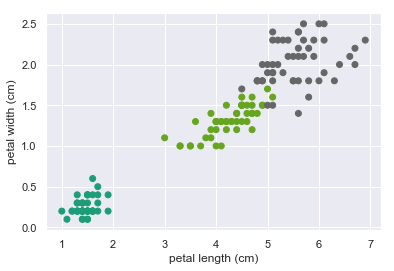

In [2]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from operator import itemgetter
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


sns.set()

k = 5
np.random.seed(3)
D = load_iris()
X_train, X_test, y_train, y_test = train_test_split(D.data, D.target, test_size=.2)


def getNNs(i, k=5):
    """
    :param i: index of the test set instance
    :param k: how many n.s?
    :return list: [...[class_of_x_train, distance_from_x_train]]
    """
    global X_train, y_train
    distances = []
    
    for j in range(0 if i - k <= 0 else i - k, i + k):
        if j == i: continue

        # calculate the euclidean distance
        d = 0
        for l in range(X_train.shape[1]):
            d += (X_test[i][l] - X_train[j][l])**2
        
        distances.append([y_train[j], np.sqrt(d)])

    return distances


y_hat = []

for testInst in X_test:
    distances = []

    # calculate the euclidean distacnce from every training point
    for j in range(X_train.shape[0]):
        distances.append([j, ((testInst - X_train[j])**2).sum()**(1/2)])

    # sort them, get the first "k"
    # and collect the individual classes in these "k"
    distances = sorted(distances, key=lambda x: x[1])[:k]    
    classes = {y_train[_[0]]: 0 for _ in distances}
   
    if len(classes.items()) == 1:
        y_hat.append( list(classes.items())[0][0] )
        continue
        
    # count and assign the number of occurences on each 
    # neighbor point's individual classes
    for d in list(distances):
        classes[y_train[d[0]]] += 1
    
    # sort them by the number of occurences around testInst
    # and get the biggest one
    y_hat.append( sorted(classes.items(), key=lambda x: x[1])[-1][0] )

    
y_hat = np.array(y_hat)

# calculate accuracy
print('Accuracy:', np.mean(y_test == y_hat), '%')

plt.scatter(D.data[:, 2], D.data[:, 3], c=D.target, cmap='Dark2')
plt.xlabel(D.feature_names[2])
plt.ylabel(D.feature_names[3])
plt.show()